<a href="https://colab.research.google.com/github/sckgn/FinalYearProject_ML/blob/main/AdaTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [134]:
asd_2018_df = pd.read_csv('dataset_2018.csv')

In [135]:
asd_2018_df.rename(columns={'Class/ASD Traits ':'ASD_Traits'}, inplace=True)

# **Default parameters**

##**Female dataset**

In [136]:
female_df = asd_2018_df[asd_2018_df['Sex']=='f']

In [137]:
female_df = female_df.drop(['Case_No', 'Qchat-10-Score','Who completed the test','Ethnicity'], axis=1)

In [164]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

# encoder = OneHotEncoder()
encoder = LabelEncoder()
scaler = MinMaxScaler()

age = ['Age_Mons']
char_vals = ['Sex','Jaundice','Family_mem_with_ASD']
target = ['ASD_Traits']

In [139]:
from sklearn.model_selection import train_test_split

X = female_df.drop("ASD_Traits", axis=1)
y = female_df["ASD_Traits"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [140]:
print(y_test)

241     Yes
1017    Yes
185     Yes
910     Yes
18       No
       ... 
587     Yes
701      No
527     Yes
438     Yes
768      No
Name: ASD_Traits, Length: 96, dtype: object


In [141]:
X_train[age] = scaler.fit_transform(X_train[age].values.reshape(-1,1))
X_test[age] = scaler.transform(X_test[age].values.reshape(-1,1))
for c in char_vals:
  X_train[c] = encoder.fit_transform(X_train[c].values.reshape(-1,1))
  X_test[c] = encoder.transform(X_test[c].values.reshape(-1,1))
y_train = encoder.fit_transform(y_train.values.reshape(-1,1))
y_test = encoder.transform(y_test.values.reshape(-1,1))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

In [142]:
print(y_test)

[1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0
 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1
 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0]


In [143]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [144]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [145]:
metrics ={'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall' : make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)}

In [146]:
def cross_validation_results(model, predictors, target, metrics):
  results = cross_validate(model, predictors, target, scoring = metrics, return_train_score=False, cv=10)

  print("Mean Test Precision: ", results['test_precision'].mean())
  print("Mean Test Recall: ", results['test_recall'].mean())
  print("Mean Test F1: ", results['test_f1_score'].mean())
  print("Accuracy: ", results['test_accuracy'].mean())

In [147]:
cross_validation_results(ada, X_train, y_train, metrics)

Mean Test Precision:  0.9803571428571429
Mean Test Recall:  0.9851648351648352
Mean Test F1:  0.981925925925926
Accuracy:  0.9776679841897234


In [148]:
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_on_test(model, predictors, target):
  predictions = model.predict(predictors)
  print("Accuracy: ", accuracy_score(target, predictions))
  print("Precision: ", precision_score(target, predictions))
  print("Recall: ", recall_score(target, predictions))
  print("F1: ", f1_score(target, predictions))
  ConfusionMatrixDisplay.from_estimator(model, predictors, target)

Accuracy:  0.96875
Precision:  0.9508196721311475
Recall:  1.0
F1:  0.9747899159663865


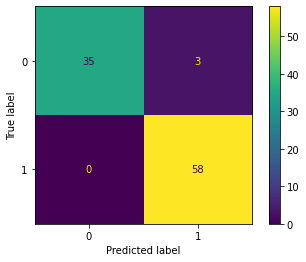

In [149]:
evaluate_on_test(ada, X_test, y_test)

In [150]:
def show_incorrectly_classified(predictors, predictions, target):
  for row_index, (input, prediction, label) in enumerate(zip(predictors.values, predictions, target)):
    if prediction != label:
        print('Row', row_index, 'has been classified as', prediction, 'and should be', label, "\nInput:",input)

In [151]:
show_incorrectly_classified(X_test, ada.predict(X_test), y_test)

Row 4 has been classified as 1 and should be 0 
Input: [1.         0.         0.         0.         1.         0.
 0.         0.         0.         1.         0.70833333 0.
 0.         0.        ]
Row 32 has been classified as 1 and should be 0 
Input: [1.         0.         0.         1.         0.         1.
 0.         0.         0.         0.         0.70833333 0.
 0.         0.        ]
Row 40 has been classified as 1 and should be 0 
Input: [0.         0.         0.         1.         0.         0.
 1.         0.         0.         1.         0.91666667 0.
 0.         1.        ]


In [203]:
ada.learning_rate

1.0

In [204]:
ada.n_estimators

100

#**GridSearchCV**

In [180]:
grid_female = female_df = asd_2018_df[asd_2018_df['Sex']=='f']

In [181]:
grid_female = grid_female.drop(['Case_No', 'Qchat-10-Score','Who completed the test','Ethnicity'], axis=1)

In [182]:
from sklearn.pipeline import Pipeline

X_grid = grid_female.drop("ASD_Traits", axis=1)
y_grid = grid_female["ASD_Traits"]

X_grid_train, X_grid_test, y_grid_train, y_grid_test = train_test_split(X_grid, y_grid, test_size=0.3, random_state=42, stratify=y)


In [183]:
y_grid_train

750    Yes
285     No
901    Yes
902    Yes
228    Yes
      ... 
53     Yes
835     No
170     No
362    Yes
39      No
Name: ASD_Traits, Length: 223, dtype: object

In [184]:
from sklearn.compose import ColumnTransformer

cat_vals = ['Sex','Jaundice','Family_mem_with_ASD']

preprocess = ColumnTransformer(
    transformers=[
        ('scaling',MinMaxScaler(),['Age_Mons']),
        ('encoding',OrdinalEncoder(),cat_vals)
    ]
)
pipeline = Pipeline(steps=[('preprocess', preprocess),
                             ('classifier', AdaBoostClassifier(random_state=42))])

target_encoder = LabelEncoder()

In [185]:
y_grid_train_prepared = target_encoder.fit_transform(y_grid_train.values.reshape(-1,1))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [186]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1.0],
}

In [196]:
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

In [197]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid=param_grid,cv=5, scoring=scorers, refit='accuracy')

In [198]:
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         MinMaxScaler(),
                                                                         ['Age_Mons']),
                                                                        ('encoding',
                                                                         OrdinalEncoder(),
                                                                         ['Sex',
                                                                          'Jaundice',
                                                                          'Family_mem_with_ASD'])])),
                                       ('classifier',
                                        AdaBoostClassifier(random_state=42))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 1.0],
                         'classifier__n_estimators': [50, 100, 200]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=weighted),
                      'precision': make_scorer(precision_score, average=weighted),
                      'recall': make_scorer(recall_score, average=weighted)})

In [199]:
grid_search.fit(X_grid_train, y_grid_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         MinMaxScaler(),
                                                                         ['Age_Mons']),
                                                                        ('encoding',
                                                                         OrdinalEncoder(),
                                                                         ['Sex',
                                                                          'Jaundice',
                                                                          'Family_mem_with_ASD'])])),
                                       ('classifier',
                                        AdaBoostClassifier(random_state=42))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 1.0],
                         'classifier__n_estimators': [50, 100, 200]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=weighted),
                      'precision': make_scorer(precision_score, average=weighted),
                      'recall': make_scorer(recall_score, average=weighted)})

In [195]:
y_grid_train

750    Yes
285     No
901    Yes
902    Yes
228    Yes
      ... 
53     Yes
835     No
170     No
362    Yes
39      No
Name: ASD_Traits, Length: 223, dtype: object

In [200]:
accuracy = grid_search.cv_results_['mean_test_accuracy']
precision = grid_search.cv_results_['mean_test_precision']
recall = grid_search.cv_results_['mean_test_recall']
f1 = grid_search.cv_results_['mean_test_f1_score']

print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


Best parameters: {'classifier__learning_rate': 1.0, 'classifier__n_estimators': 200}
Best score: 0.71
Accuracy:  [0.6859596  0.6859596  0.6859596  0.6859596  0.69060606 0.69949495
 0.69959596 0.69959596 0.7130303 ]
Precision:  [0.7037002  0.7037002  0.7037002  0.7037002  0.70051049 0.70067579
 0.69830479 0.69830479 0.71747274]
Recall:  [0.6859596  0.6859596  0.6859596  0.6859596  0.69060606 0.69949495
 0.69959596 0.69959596 0.7130303 ]
F1 Score:  [0.64886533 0.64886533 0.64886533 0.64886533 0.657701   0.67097144
 0.67763161 0.67763161 0.69577427]


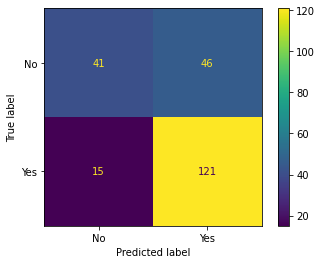

In [201]:
ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_grid_train, y_grid_train)

In [205]:
y_grid_pred = grid_search.predict(X_grid_test)

In [207]:
# evaluate_on_test(grid_search, X_grid_test, y_grid_test)